# Analytics

In [1]:
from collections import Counter
import json
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. load data
all_qualities = {}
quality_files = {}
all_scene_counts = {}
scene_count_files = {}
n_runs = 0
data_path = 'random_test_outputs_2/'
for fn in os.listdir(data_path):
    if fn.endswith('data.txt'):
        n_runs += 1
        with open(data_path + fn) as f:
            json_data = json.load(f)
        for k, v in json_data['qualities'].items():
            if k in all_qualities:
                all_qualities[k].append(v)
            else:
                all_qualities[k] = [v]
        quality_files[fn[:3]] = json_data['qualities']
    elif fn.endswith('output.txt'):
        run_scene_counts = Counter()
        prev_scene = ''
        with open(data_path + fn) as f:
            output = f.readlines()
        for line in output:
            if line.startswith('>>>'):
                scene_name = line[4:].strip()
                if prev_scene == 'Continue...':
                    run_scene_counts[scene_name] += 1
                prev_scene = scene_name
        for scene_name, count in run_scene_counts.items():
            if scene_name in all_scene_counts:
                all_scene_counts[scene_name].append(count)
            else:
                all_scene_counts[scene_name] = [count]
        scene_count_files[fn[:3]] = run_scene_counts
                
for k, v in all_qualities.items():
    if len(v) < n_runs:
        v += [0]*(n_runs - len(v))
for k, v in all_scene_counts.items():
    if len(v) < n_runs:
        v += [0]*(n_runs - len(v))

In [3]:
qualities_df = pd.DataFrame(quality_files).T
scenes_df = pd.DataFrame(scene_count_files).T

In [4]:
scenes_df.to_csv('scene_counts.csv')
qualities_df.to_csv('qualities.csv')

In [5]:
print(list(sorted(all_qualities.keys())))

['afrikaans', 'age', 'aquarium', 'art-words', 'assessments', 'barron-crisis', 'barrons', 'barrons-card', 'birthdaying', 'bookstore', 'child-led', 'church-introduced', 'collage-ready', 'copy-error', 'cosmetics-studied', 'coupons-offered', 'cyan', 'dinner', 'doll', 'english', 'epilogued', 'format-change', 'friends-introduced', 'genius', 'gerbil-studied', 'greekletters', 'hairdresser', 'hawaiian', 'highest-win', 'housework', 'hyalithe', 'isgreek', 'ishungarian', 'isindonesian', 'isspanish', 'jerome', 'jerome-texted', 'latin-study', 'lectern', 'legend', 'lessons', 'let-introduced', 'lettice', 'lettice-monster', 'materials-studied', 'minestrone', 'month', 'motivation', 'newslettering', 'not-talking', 'parents', 'pedagogue', 'perry', 'photosynthesis', 'poverty', 'previous-missed', 'projects', 'psitta', 'sara', 'spelling', 'spelling-relief', 'status', 'threats-useless', 'topeng-defined', 'tyler', 'visiting', 'warned', 'wednesday-done', 'william', 'william-intervention', 'world']


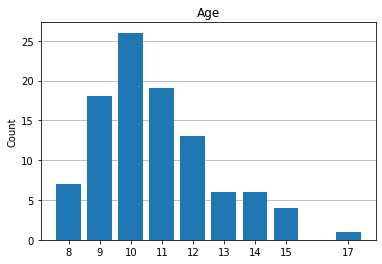

In [6]:
labels, counts = np.unique(all_qualities['age'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.grid(axis='y', zorder=0)
plt.gca().set_axisbelow(True)
plt.title('Age')
plt.ylabel('Count')
plt.show()

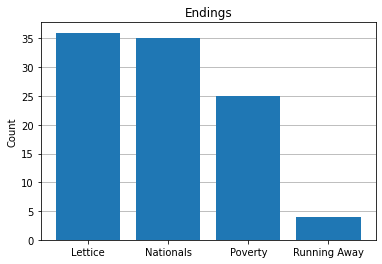

In [7]:
ending_counts = Counter(all_qualities['month'])
end_x = ['Lettice', 'Nationals', 'Poverty', 'Running Away']
end_y = [ending_counts[26], ending_counts[27], ending_counts[29], ending_counts[30]]
plt.bar(end_x, end_y)
plt.grid(axis='y', zorder=0)
plt.gca().set_axisbelow(True)
plt.title('Endings')
plt.ylabel('Count')
plt.show()

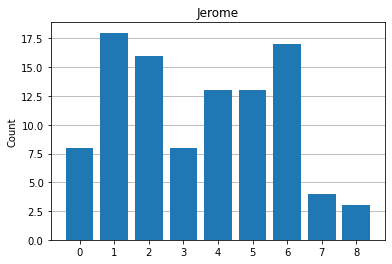

In [8]:
labels, counts = np.unique(all_qualities['jerome'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.grid(axis='y', zorder=0)
plt.gca().set_axisbelow(True)
plt.title('Jerome')
plt.ylabel('Count')
plt.show()

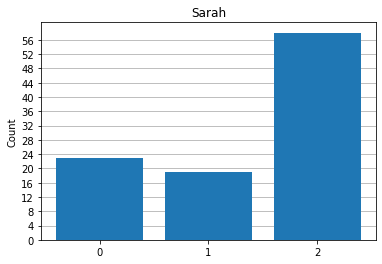

In [9]:
labels, counts = np.unique(all_qualities['sara'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.grid(axis='y', zorder=0)
plt.gca().set_axisbelow(True)
plt.title('Sarah')
plt.ylabel('Count')
plt.gca().set_yticks(range(0, int(max(counts)) + 1, 4))
plt.show()

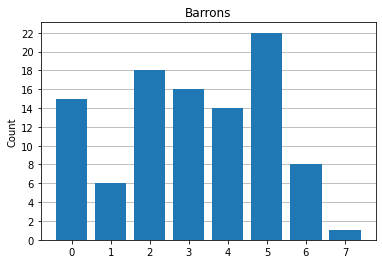

In [10]:
labels, counts = np.unique(all_qualities['barrons'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.grid(axis='y', zorder=0)
plt.gca().set_axisbelow(True)
plt.title('Barrons')
plt.ylabel('Count')
plt.gca().set_yticks(range(0, int(max(counts)) + 1, 2))
plt.show()

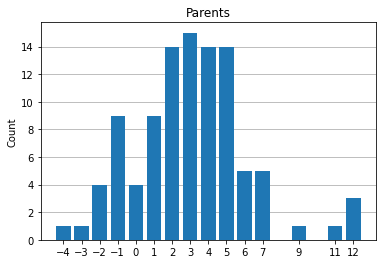

In [11]:
labels, counts = np.unique(all_qualities['parents'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.grid(axis='y', zorder=0)
plt.gca().set_axisbelow(True)
plt.title('Parents')
plt.ylabel('Count')
plt.gca().set_yticks(range(0, int(max(counts)) + 1, 2))
plt.show()

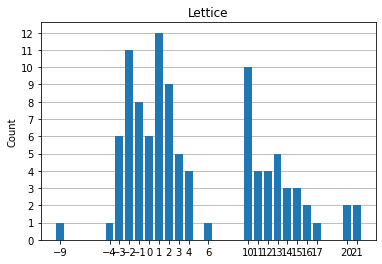

In [12]:
labels, counts = np.unique(all_qualities['lettice'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.grid(axis='y', zorder=0)
plt.gca().set_axisbelow(True)
plt.title('Lettice')
plt.ylabel('Count')
plt.gca().set_yticks(range(0, int(max(counts)) + 1))
plt.show()

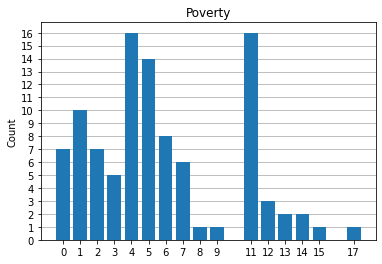

In [13]:
labels, counts = np.unique(all_qualities['poverty'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.grid(axis='y', zorder=0)
plt.gca().set_axisbelow(True)
plt.title('Poverty')
plt.ylabel('Count')
plt.gca().set_yticks(range(0, int(max(counts)) + 1))
plt.show()

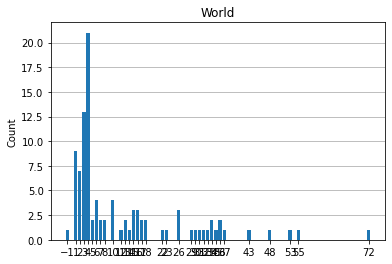

In [18]:
labels, counts = np.unique(all_qualities['world'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.grid(axis='y', zorder=0)
plt.gca().set_axisbelow(True)
plt.title('World')
plt.ylabel('Count')
plt.show()

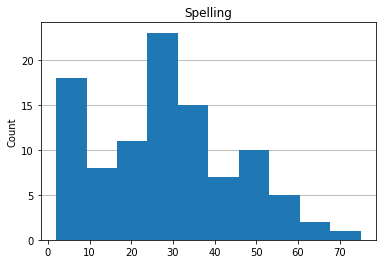

In [19]:
labels, counts = np.unique(all_qualities['spelling'], return_counts=True)
plt.hist(all_qualities['spelling'])
plt.title('Spelling')
plt.ylabel('Count')
plt.grid(axis='y', zorder=0)
plt.gca().set_axisbelow(True)
plt.show()

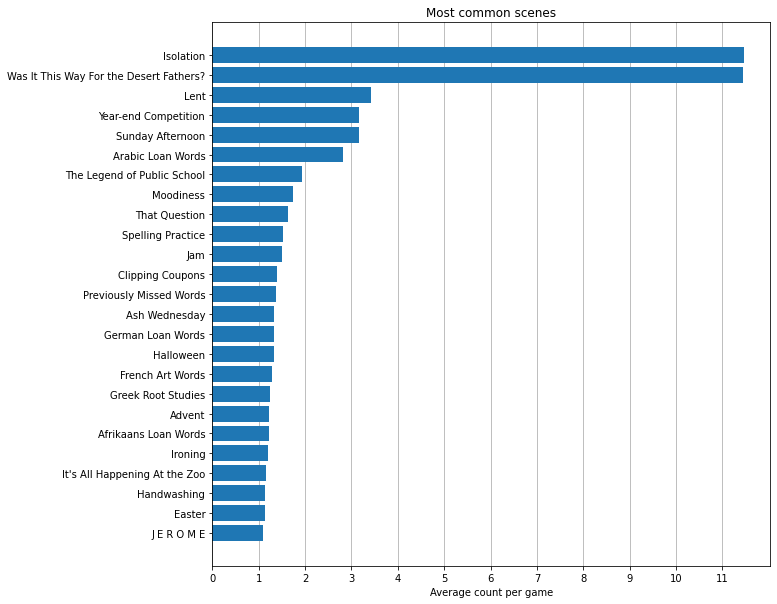

In [16]:
# TODO: find the most common scenes
scene_averages = {k: np.mean(v) for k, v in all_scene_counts.items()}
top_scenes = Counter(scene_averages).most_common(25)
top_scenes.reverse()
plt.subplots(figsize=(10, 10))
plt.grid(axis='x', zorder=0)
plt.gca().set_axisbelow(True)
plt.barh([x[0] for x in top_scenes], [x[1] for x in top_scenes])
plt.gca().set_xticks(range(0, int(top_scenes[24][1]) + 1))
plt.xlabel('Average count per game')
plt.title('Most common scenes')
plt.show()

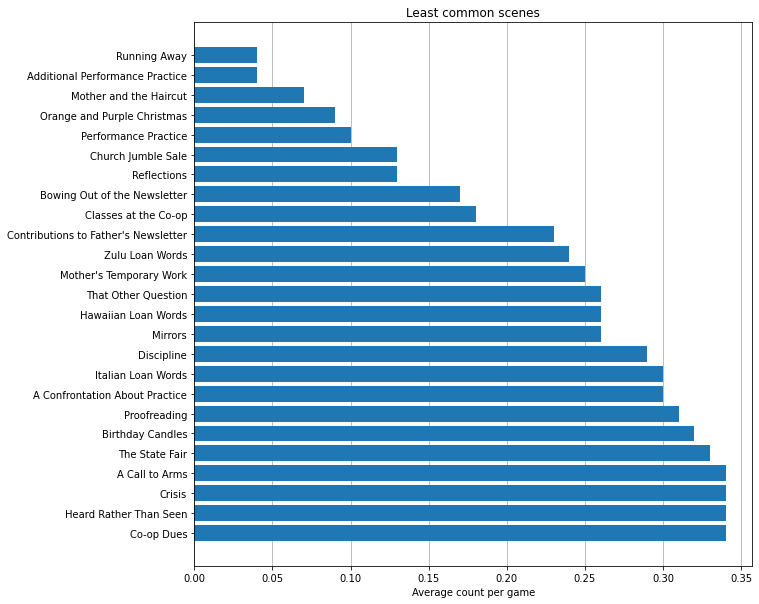

In [17]:
least_common = Counter(scene_averages).most_common(1000)[-25:]
plt.subplots(figsize=(10, 10))
plt.grid(axis='x', zorder=0)
plt.gca().set_axisbelow(True)
plt.barh([x[0] for x in least_common], [x[1] for x in least_common])
plt.xlabel('Average count per game')
plt.title('Least common scenes')
plt.show()